In [2]:
import sys,re,os
import folium
from folium.plugins import MarkerCluster
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

plt.rcParams['font.family']='Malgun Gothic' # 차트에서 한글 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False  # 차트에서 기호 깨짐 방지

os.chdir('c:/test/jeonbuk_commercial_data/')


In [3]:
def create_dongs_df(dongs,years):
    dongs_df = pd.DataFrame(index=dongs)
    # dongs_df.columns = [years]
    for year in years:
        filename = f'소상공인시장진흥공단_상가(상권)정보_전북_20{year}.csv'
        df = pd.read_csv(filename,encoding='utf-8',thousands=',',low_memory=False)
        df = df[['상호명',  '상권업종소분류명',  '시군구명', '행정동명',  '지번주소', 
                     '도로명', '도로명주소', '경도', '위도']]
        df.columns = ['상호명',  '소분류명', '시군구명', '행정동명', '지번주소', '도로명', '도로명주소', '경도',
               '위도']

        df = df[(df['소분류명'].str.contains('편의점')) & df['시군구명'].str.contains('전주')] # 전주 데이터만 추출
        
        temp = []
        for dong in dongs:
            c = df[df['행정동명'].str.contains(dong)]['행정동명'].count()
            # print(c)
            temp.append([c])
            
        count_df = pd.DataFrame(temp,index=dongs)
        count_df.columns = [year]
        dongs_df = pd.merge(dongs_df,count_df,left_index=True,right_index=True,how='left')
        
    return dongs_df



# create_dongs_df(dongs,years)

In [4]:
def create_dongs_pop(dongs,years) :
    dongs_pop_df = pd.DataFrame(index=dongs)
    for year in years :
        pop = pd.read_csv(f'전주시연령별인구현황_20{year}.csv',encoding="cp949",thousands=",",low_memory=False)
        pop = pop.iloc[:,[0,1,4,5,6,7]]
        pop.columns=['행정구역', '총인구수', '10대', '20대','30대', '40대']
        
        temp = []
        
        for dong in dongs :
            s_pop = pop[pop['행정구역'].str.contains(dong) & pop['행정구역'].str.contains('전주')]
            sum_pop = list(s_pop[['총인구수', '10대', '20대','30대', '40대']].sum())
            
            temp.append([s for s in sum_pop])
            
        # print(temp)    
        fm_pop_df=pd.DataFrame(temp,index=dongs)
        fm_pop_df.columns=[f'{year}총인구수', '10대', '20대', '30대', '40대']
        
        fm_pop_df[f'{year}주사용인구']=fm_pop_df.loc[:,'10대':'40대'].sum(axis=1)
        dongs_pop_df=pd.merge(dongs_pop_df,fm_pop_df[[f'{year}총인구수',f'{year}주사용인구']],
                              how='left',left_index=True,right_index=True)
    return dongs_pop_df

In [5]:
dongs = input().split()

years = ['2112','2203','2206','2209','2303']

In [6]:

dongs_df = create_dongs_df(dongs,years)
dongs_pop_df = create_dongs_pop(dongs,years)

# print(dongs_df)
# print(dongs_pop_df)

total_df=pd.merge(dongs_df,dongs_pop_df, how='left', left_index= True, right_index= True)

print(total_df)

pop_div_store_df1=pd.DataFrame(index=dongs)
pop_div_store_df2=pd.DataFrame(index=dongs)

for year in years:
    pop_div_store_df1[year]=total_df[f'{year}총인구수']//total_df[year]
    pop_div_store_df2[year]=total_df[f'{year}주사용인구']//total_df[year]
    
pop_div_store_df1
pop_div_store_df2


    2112  2203  2206  2209  2303  2112총인구수  2112주사용인구  2203총인구수  2203주사용인구  \
효자   134   132   134   140   147    111670      64178    111606      63857   
평화    30    31    31    33    42     58701      28503     58411      28243   
송천    54    59    59    62    60     89883      52482     90049      52459   
인후    50    52    53    56    59     61259      32712     61061      32435   

    2206총인구수  2206주사용인구  2209총인구수  2209주사용인구  2303총인구수  2303주사용인구  
효자    111335      63490    112625      64049    111794      62927  
평화     58164      27989     57624      27475     56707      26537  
송천     89908      52214     89657      51931     88860      50992  
인후     60759      32138     60414      31758     59498      30818  


,2112,2203,2206,2209,2303
효자,478,483,473,457,428
평화,950,911,902,832,631
송천,971,889,884,837,849
인후,654,623,606,567,522


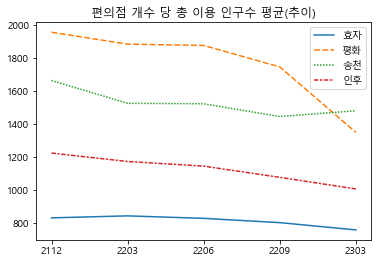

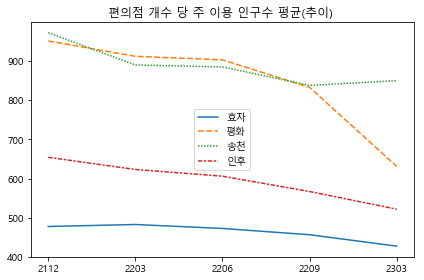

In [7]:
f1 = plt.figure()
plt.title("편의점 개수 당 총 이용 인구수 평균(추이)")
sns.lineplot(data = pop_div_store_df1.T)

f2 = plt.figure()
plt.title("편의점 개수 당 주 이용 인구수 평균(추이) ")
# plt.title(f"{dongs} 지역 편의점 당 주 사용 인구수 추이")
sns.lineplot(data=pop_div_store_df2.T)

plt.tight_layout()
plt.show()

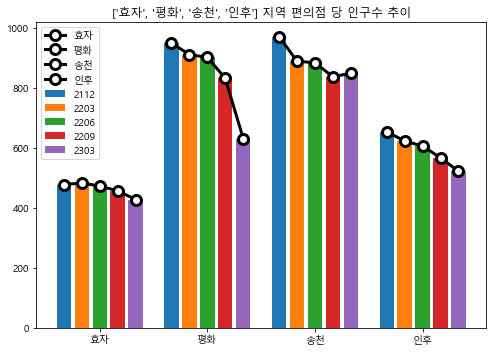

In [8]:
plt.figure(figsize=(7,5))
plt.title(f"{dongs} 지역 편의점 당 인구수 추이")


for i,fm in enumerate(years):
    plt.bar(np.arange(len(dongs))+i/6, pop_div_store_df2[fm], width=0.8/6, label=fm)
    
    
for i,dong in enumerate(dongs):
    plt.plot([i+j/6 for j in range(5)], pop_div_store_df2.loc[dong],
             c='k',lw=3,marker='o',ms=10,mew=3,mfc='w',mec='k')
    
    
plt.xticks(np.arange(len(dongs))+2/6, dongs)
plt.legend(loc=2)

plt.tight_layout()
plt.show()

    컴퓨터 학원  스터디 카페
송천       4       6
인후       5       8


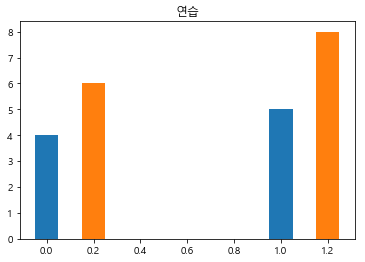

In [9]:
pra_list = [[4,6],[5,8]]
dfdfdf = pd.DataFrame(pra_list, index=['송천','인후'])

dfdfdf.columns = ['컴퓨터 학원','스터디 카페']



print(dfdfdf)

fig1 = plt.figure()
plt.title("연습")

x = np.arange(2)
# plt.xticks(['송천', '인후'])

for i, list in enumerate(dfdfdf.columns) :
    plt.bar(x+i/5, dfdfdf[list], label = ['송천', '인후'], width=0.1)

,2112,2203,2206,2209,2303
효자,478,483,473,457,428
평화,950,911,902,832,631
송천,971,889,884,837,849
인후,654,623,606,567,522


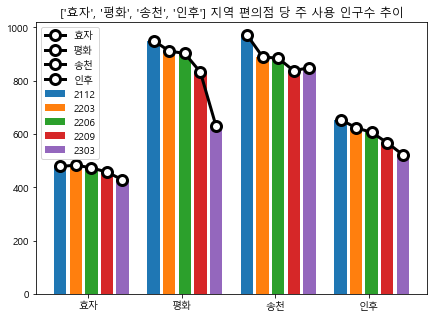

In [44]:
plt.figure(figsize=(7,5))
plt.title(f"{dongs} 지역 편의점 당 주 사용 인구수 추이")

for i, year in enumerate(years) :
    plt.bar(x=np.arange(len(dongs)) + i/6,width=0.8/6, height=pop_div_store_df2[year],label = year)    
    

for i,dong in enumerate(dongs) :
    plt.plot([i +k/6 for k in range(5)],pop_div_store_df2.loc[dong],c='k',lw=3,marker='o',ms=10,mew=3,mfc='w',mec='k')
    
plt.xticks(np.arange(4) + 0.3,dongs)
plt.legend(loc = 2)

pop_div_store_df2